# Análisis exploratorio: Corona virus (Covid-19)

In [2]:
# Introducción a la Minería de datos
# Hito 1
# Por Raúl Cid, José Espina, Alejandro Veragua y Michelle <poner apellido acaaa>
# Dataset original: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt # para dibujar
import os # para cargar los csv
import ntpath # para extraer el nombre del archivo de cada path

# Funciones definidas por nosotros
def calcularEstadisticos(dataFrame):
    total = len(dataFrame)
    print('------------ NULOS ------------')
    nulos = dataFrame.isna().sum()
    print(nulos)
    print('------------ MINIMOS ------------')
    minimos = dataFrame.min()
    print(minimos)
    print('------------ MAXIMOS ------------')
    maximos = dataFrame.max()
    print(maximos)
    print('------------ PROMEDIOS ------------')
    promedios = dataFrame[['Confirmed', 'Deaths', 'Recovered']].mean()
    print(promedios)
    print('------------ STD ------------')
    std = dataFrame[['Confirmed', 'Deaths', 'Recovered']].std()
    print(std)

# Se prepara carga de los archivos del dataset
paths = []
for dirname, _, filenames in os.walk('./novel-corona-virus-2019-dataset'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        paths.append(path);

## Observaciones
* El archivo */kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv* tiene las columnas vacias al final 
* El archivo */kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv* tiene la cuarta columa vacía, y las del final

In [3]:
print(paths)
dataFrames = {}
for path in paths:
    print('Se ha cargado {path}'.format(path = path))
    dataFrames[ntpath.basename(path)] = pd.read_csv(path)

['./novel-corona-virus-2019-dataset\\COVID19_line_list_data.csv', './novel-corona-virus-2019-dataset\\COVID19_open_line_list.csv', './novel-corona-virus-2019-dataset\\covid_19_data.csv', './novel-corona-virus-2019-dataset\\time_series_covid_19_confirmed.csv', './novel-corona-virus-2019-dataset\\time_series_covid_19_confirmed_US.csv', './novel-corona-virus-2019-dataset\\time_series_covid_19_deaths.csv', './novel-corona-virus-2019-dataset\\time_series_covid_19_deaths_US.csv', './novel-corona-virus-2019-dataset\\time_series_covid_19_recovered.csv']
Se ha cargado ./novel-corona-virus-2019-dataset\COVID19_line_list_data.csv
Se ha cargado ./novel-corona-virus-2019-dataset\COVID19_open_line_list.csv
Se ha cargado ./novel-corona-virus-2019-dataset\covid_19_data.csv
Se ha cargado ./novel-corona-virus-2019-dataset\time_series_covid_19_confirmed.csv
Se ha cargado ./novel-corona-virus-2019-dataset\time_series_covid_19_confirmed_US.csv
Se ha cargado ./novel-corona-virus-2019-dataset\time_series_cov

# I Análisis Exploratorio

Se propone las siguientes acciones como primer acercamiento a los datos
1. Para cada archivo CSV del *dataset*, describir cada una de las columnas
2. Contar datos NaNs (Not a Number) por cada columna
3. Calcular estadísticas básicas, tales como mínimos, máximos, medias, desviación estándar y otros
4. Definir países de interés la cantidad de registros de cada uno de ellos

## Archivo *covid_19_data.csv*

Este archivo describe la cantidad de afectados por el virus para casos confirmados, fallecimientos y recuperados, de forma acumulativa. Posee las siguientes columnas:

* ObservationDate: Corresponde a la fecha en que se tomó el dato
* Province/State: Corresponde al nombre de la provincia o región del país donde se tomó el dato
* Country/Region: Corresponde al nombre del país donde se tomó el dato
* Last Update: Corresponde a la fecha en que actualizó el dato por última vez
* Confirmed: Corresponde a la cantidad acumulada de personas contagiadas del virus confirmadas hasta la fecha
* Deaths: Corresponde a la cantidad acumulada de personas fallecidas por el virus confirmadas hasta la fecha
* Recovered: Corresponde a la cantidad acumulada de personas recuperadas del virus hasta la fecha

### Estadísticas básicas

| Nombre columna  | Filas   | Nulos | Tipo de dato | Mínimo   | Máximo   |
|-----------------|---------|-------|--------------|----------|----------|
| ObservationDate |  9423   |  0    |    Date      |01/22/2020|03/27/2020|
| Province/State  |  9423   | 4260  |    Text      |NO APLICA |NO APLICA |
| Country/Region  |  9423   |   0   |    Text      |NO APLICA |NO APLICA |
| Last Update     |  9423   |   0   |    Date      |1/22/2020 | 3/8/20   |
| Confirmed       |  9423   |   0   |    Number    |    0     |   86498  |
| Deaths          |  9423   |   0   |    Number    |    0     |   9134   |
| Recovered       |  9423   |   0   |    Number    |    0     |  61732   |

# ***POR HACER*** Hacer el mismo análisis para el resto de los archivos

In [4]:
# Cálculo estadísticas básicas
covid19Data = dataFrames['covid_19_data.csv']
calcularEstadisticos(covid19Data)

------------ NULOS ------------
SNo                   0
ObservationDate       0
Province/State     5486
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64
------------ MINIMOS ------------
SNo                              1
ObservationDate         01/22/2020
Country/Region          Azerbaijan
Last Update        1/22/2020 17:00
Confirmed                        0
Deaths                           0
Recovered                        0
dtype: object
------------ MAXIMOS ------------
SNo                                         11614
ObservationDate                        04/03/2020
Country/Region     occupied Palestinian territory
Last Update                           3/8/20 5:31
Confirmed                                  119827
Deaths                                      14681
Recovered                                   63612
dtype: object
------------ PROMEDIOS ------------
Confirmed    1175.025831
Deaths     

In [5]:
covid19Data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
11609,11610,04/03/2020,Wyoming,US,2020-04-03 22:52:45,162.0,0.0,0.0
11610,11611,04/03/2020,Xinjiang,Mainland China,2020-04-03 22:52:45,76.0,3.0,73.0
11611,11612,04/03/2020,Yukon,Canada,2020-04-03 22:52:45,6.0,0.0,0.0
11612,11613,04/03/2020,Yunnan,Mainland China,2020-04-03 22:52:45,184.0,2.0,172.0


In [6]:
def calcularDistribucionRelativa(distribucionAcumulada):
    """ Este metodo calcula la distribucion relativa, que se obtiene a partir de la ecumulada. Esto es, los valores diferenciales
    entre t[n+1] - t[n]. Por ejemplo en COVID, los casos confirmados corresponden a la acumulacion total de casos, y para obtener
    cuandos casos nuevos por dia se han detectado es necesario calcular la diferencia entre las observaciones del dia de hoy,
    y las de ayer.
    Se considera que el primer caso acumulado, le antecede un valor 0 (no existian casos antes de la primera observacion), por
    ello se agrega en la distribucion relativa el primer caso acumulado, y asi tener el mismo tamaño del arreglo.
    
    Arguments:
        distribucionAcumulada {[ndarray]} -- Vector de la distribucion acumulada
    
    Returns:
        [ndarray] -- Vector de la distribucion relativa
    """
    return np.append(distribucionAcumulada[0], distribucionAcumulada[1:] - distribucionAcumulada[:-1])

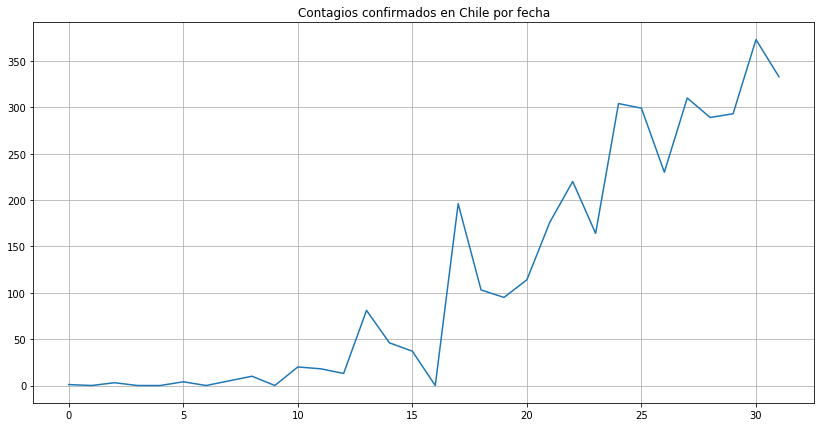

Text(0.5, 1.0, 'Contagiados acumulados confirmados en Chile por fecha')

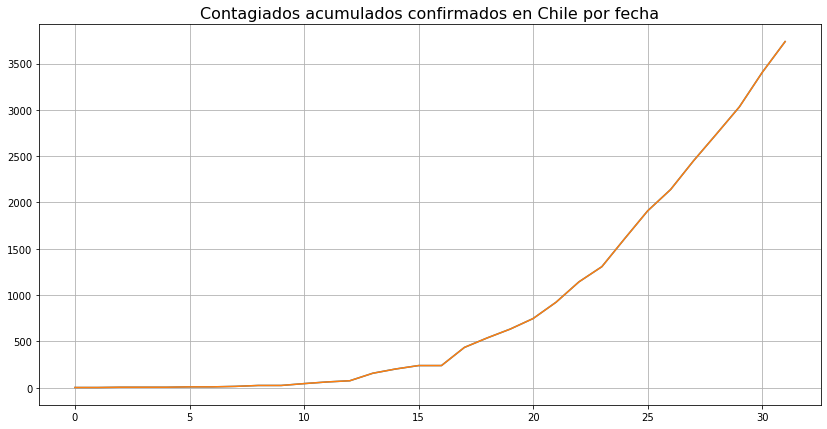

In [7]:
chileCovid = covid19Data[covid19Data['Country/Region'] == 'Chile']

distribucionConfirmados = calcularDistribucionRelativa(chileCovid['Confirmed'].values)

plt.figure(figsize=(14, 7))
plt.title("Contagios confirmados en Chile por fecha")
plt.grid(True)
plt.plot(distribucionConfirmados)

plt.show()

plt.figure(figsize=(14, 7))
plt.grid(True)
plt.plot(chileCovid['Confirmed'].values)
plt.plot(distribucionConfirmados.cumsum())

plt.title('Contagiados acumulados confirmados en Chile por fecha', fontsize=16)



In [10]:
data = []
for name, group in covid19Data.groupby('Country/Region') :
    covid19CurrentCountry = covid19Data[covid19Data['Country/Region'] == name]
    data.append({
        'Country/Region' : [name]*len(calcularDistribucionRelativa(covid19CurrentCountry['Confirmed'].values)),
        'ObservationDate' : covid19CurrentCountry['ObservationDate'].values,
        'Confirmed' : calcularDistribucionRelativa(covid19CurrentCountry['Confirmed'].values),
        'Deaths' : calcularDistribucionRelativa(covid19CurrentCountry['Deaths'].values),
        'Recovered' : calcularDistribucionRelativa(covid19CurrentCountry['Recovered'].values)
    })
df = pd.DataFrame(data=data)
for key, item in covid19Data.groupby("Country/Region"):
    print(grouped_df.get_group(key), "\n\n")

,Country/Region,ObservationDate,Confirmed,Deaths,Recovered
0,[ Azerbaijan],[02/28/2020],[1.0],[0.0],[0.0]
1,"[('St. Martin',)]",[03/10/2020],[2.0],[0.0],[0.0]
2,"[Afghanistan, Afghanistan, Afghanistan, Afghan...","[02/24/2020, 02/25/2020, 02/26/2020, 02/27/202...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[Albania, Albania, Albania, Albania, Albania, ...","[03/09/2020, 03/10/2020, 03/11/2020, 03/12/202...","[2.0, 8.0, 2.0, 11.0, 10.0, 5.0, 4.0, 9.0, 4.0...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[Algeria, Algeria, Algeria, Algeria, Algeria, ...","[02/25/2020, 02/26/2020, 02/27/2020, 02/28/202...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 7.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...
211,"[Vietnam, Vietnam, Vietnam, Vietnam, Vietnam, ...","[01/23/2020, 01/24/2020, 01/25/2020, 01/26/202...","[2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
212,"[West Bank and Gaza, West Bank and Gaza, West ...","[03/26/2020, 03/27/2020, 03/28/2020, 03/29/202...","[84.0, 7.0, 7.0, 11.0, 7.0, 3.0, 15.0, 27.0, 3...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[17.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0]"
213,"[Zambia, Zambia, Zambia, Zambia, Zambia, Zambi...","[03/18/2020, 03/19/2020, 03/20/2020, 03/21/202...","[2.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 9.0, 4.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
214,"[Zimbabwe, Zimbabwe, Zimbabwe, Zimbabwe, Zimba...","[03/20/2020, 03/21/2020, 03/22/2020, 03/23/202...","[1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


# Archivo *time_series_covid_19_confirmed.csv*
Este archivo describe los casos confirmados en el tiempo, por país

In [ ]:
casosConfirmados = dataFrames['time_series_covid_19_confirmed.csv']
casosConfirmados

# Archivo *time_series_covid_19_recovered.csv*
Este archivo describe los casos recuperados en el tiempo

In [ ]:
casosRecuperados = dataFrames['time_series_covid_19_recovered.csv']

# Archivo *time_series_covid_19_deaths.csv*
Este archivo describe los casos de muerte en el tiempo

In [ ]:
dataFrames['time_series_covid_19_deaths.csv']

# Archivo *COVID19_open_line_list*
Casos georeferenciados, datos personales y síntomas

In [ ]:
dataFrames['COVID19_open_line_list.csv']

# Archivo *COVID19_open_line_list*

In [ ]:
dataFrames['COVID19_line_list_data.csv']